In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Cases")
    plt.grid(True)

In [3]:
import csv

In [4]:
confirmed=[]

In [5]:
with open('nation_level_daily.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        confirmed.append(float(row[2]))

In [6]:
time=np.arange(0,len(confirmed))

In [7]:
series = np.array(confirmed)

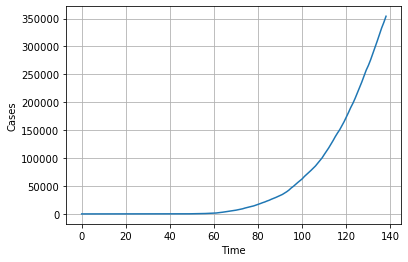

In [8]:
plot_series(time, series)

In [9]:
split_time = 132
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [10]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1) 
    ds = tf.data.Dataset.from_tensor_slices(series) 
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True) 
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:])) 
    return ds.batch(batch_size).prefetch(1)

In [11]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [12]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [13]:
window_size = 32
batch_size = 128 
shuffle_buffer_size = 100
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(50, activation="relu", return_sequences=True),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100)
])

In [15]:
model.compile(loss="mse",
              optimizer="adam")
history = model.fit(train_set, epochs=2000)


Epoch 1/2000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1/1 [==============================] - 0s 9ms/step - loss: 104191516672.0000
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 89902186496.0000
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 97754816512.0000
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 3013963415552.0000
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 2952620933120.0000
Epoch 6/2000
1/1 [==============================] - 0s 1ms

Epoch 84/2000
1/1 [==============================] - 0s 1ms/step - loss: 46766338048.0000
Epoch 85/2000
1/1 [==============================] - 0s 1ms/step - loss: 46390231040.0000
Epoch 86/2000
1/1 [==============================] - 0s 1ms/step - loss: 46015930368.0000
Epoch 87/2000
1/1 [==============================] - 0s 1ms/step - loss: 45643034624.0000
Epoch 88/2000
1/1 [==============================] - 0s 1ms/step - loss: 45272498176.0000
Epoch 89/2000
1/1 [==============================] - 0s 1ms/step - loss: 44903829504.0000
Epoch 90/2000
1/1 [==============================] - 0s 1ms/step - loss: 44537036800.0000
Epoch 91/2000
1/1 [==============================] - 0s 1ms/step - loss: 44172177408.0000
Epoch 92/2000
1/1 [==============================] - 0s 1ms/step - loss: 43809222656.0000
Epoch 93/2000
1/1 [==============================] - 0s 1ms/step - loss: 43448176640.0000
Epoch 94/2000
1/1 [==============================] - 0s 1ms/step - loss: 43089027072.0000
Epoch 95/2

1/1 [==============================] - 0s 2ms/step - loss: 1890985216.0000
Epoch 175/2000
1/1 [==============================] - 0s 1ms/step - loss: 2177507584.0000
Epoch 176/2000
1/1 [==============================] - 0s 1ms/step - loss: 2451529728.0000
Epoch 177/2000
1/1 [==============================] - 0s 1ms/step - loss: 2683250944.0000
Epoch 178/2000
1/1 [==============================] - 0s 1ms/step - loss: 2850827776.0000
Epoch 179/2000
1/1 [==============================] - 0s 2ms/step - loss: 2944257280.0000
Epoch 180/2000
1/1 [==============================] - 0s 1ms/step - loss: 2961485312.0000
Epoch 181/2000
1/1 [==============================] - 0s 2ms/step - loss: 2908407040.0000
Epoch 182/2000
1/1 [==============================] - 0s 1ms/step - loss: 2796763136.0000
Epoch 183/2000
1/1 [==============================] - 0s 1ms/step - loss: 2640890368.0000
Epoch 184/2000
1/1 [==============================] - 0s 1ms/step - loss: 2457314304.0000
Epoch 185/2000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 1163025920.0000
Epoch 266/2000
1/1 [==============================] - 0s 1ms/step - loss: 1161630720.0000
Epoch 267/2000
1/1 [==============================] - 0s 1ms/step - loss: 1160246528.0000
Epoch 268/2000
1/1 [==============================] - 0s 2ms/step - loss: 1158873600.0000
Epoch 269/2000
1/1 [==============================] - 0s 1ms/step - loss: 1157509760.0000
Epoch 270/2000
1/1 [==============================] - 0s 1ms/step - loss: 1156151808.0000
Epoch 271/2000
1/1 [==============================] - 0s 1ms/step - loss: 1154793472.0000
Epoch 272/2000
1/1 [==============================] - 0s 1ms/step - loss: 1153435904.0000
Epoch 273/2000
1/1 [==============================] - 0s 1ms/step - loss: 1152077440.0000
Epoch 274/2000
1/1 [==============================] - 0s 2ms/step - loss: 1150717568.0000
Epoch 275/2000
1/1 [==============================] - 0s 1ms/step - loss: 1149354752.0000
Epoch 276/2000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 1035200832.0000
Epoch 357/2000
1/1 [==============================] - 0s 2ms/step - loss: 1033831360.0000
Epoch 358/2000
1/1 [==============================] - 0s 1ms/step - loss: 1032455936.0000
Epoch 359/2000
1/1 [==============================] - 0s 1ms/step - loss: 1031083520.0000
Epoch 360/2000
1/1 [==============================] - 0s 1ms/step - loss: 1029718656.0000
Epoch 361/2000
1/1 [==============================] - 0s 1ms/step - loss: 1028354880.0000
Epoch 362/2000
1/1 [==============================] - 0s 1ms/step - loss: 1026985152.0000
Epoch 363/2000
1/1 [==============================] - 0s 1ms/step - loss: 1025601920.0000
Epoch 364/2000
1/1 [==============================] - 0s 2ms/step - loss: 1024247872.0000
Epoch 365/2000
1/1 [==============================] - 0s 1ms/step - loss: 1022882688.0000
Epoch 366/2000
1/1 [==============================] - 0s 1ms/step - loss: 1021510144.0000
Epoch 367/2000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 909383936.0000
Epoch 448/2000
1/1 [==============================] - 0s 1ms/step - loss: 908084096.0000
Epoch 449/2000
1/1 [==============================] - 0s 1ms/step - loss: 906786816.0000
Epoch 450/2000
1/1 [==============================] - 0s 1ms/step - loss: 905493056.0000
Epoch 451/2000
1/1 [==============================] - 0s 2ms/step - loss: 904201728.0000
Epoch 452/2000
1/1 [==============================] - 0s 2ms/step - loss: 902913536.0000
Epoch 453/2000
1/1 [==============================] - 0s 2ms/step - loss: 901628160.0000
Epoch 454/2000
1/1 [==============================] - 0s 2ms/step - loss: 900344576.0000
Epoch 455/2000
1/1 [==============================] - 0s 1ms/step - loss: 899063040.0000
Epoch 456/2000
1/1 [==============================] - 0s 1ms/step - loss: 897781824.0000
Epoch 457/2000
1/1 [==============================] - 0s 1ms/step - loss: 896498304.0000
Epoch 458/2000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 795598848.0000
Epoch 540/2000
1/1 [==============================] - 0s 2ms/step - loss: 794419136.0000
Epoch 541/2000
1/1 [==============================] - 0s 1ms/step - loss: 793240512.0000
Epoch 542/2000
1/1 [==============================] - 0s 1ms/step - loss: 792063040.0000
Epoch 543/2000
1/1 [==============================] - 0s 1ms/step - loss: 790886464.0000
Epoch 544/2000
1/1 [==============================] - 0s 1ms/step - loss: 789710912.0000
Epoch 545/2000
1/1 [==============================] - 0s 2ms/step - loss: 788537088.0000
Epoch 546/2000
1/1 [==============================] - 0s 2ms/step - loss: 787365120.0000
Epoch 547/2000
1/1 [==============================] - 0s 1ms/step - loss: 786194432.0000
Epoch 548/2000
1/1 [==============================] - 0s 2ms/step - loss: 785025536.0000
Epoch 549/2000
1/1 [==============================] - 0s 998us/step - loss: 783857600.0000
Epoch 550/2000
1/1 [==============

1/1 [==============================] - 0s 2ms/step - loss: 692362944.0000
Epoch 632/2000
1/1 [==============================] - 0s 2ms/step - loss: 691300352.0000
Epoch 633/2000
1/1 [==============================] - 0s 1ms/step - loss: 690239104.0000
Epoch 634/2000
1/1 [==============================] - 0s 1ms/step - loss: 689182528.0000
Epoch 635/2000
1/1 [==============================] - 0s 1ms/step - loss: 688124672.0000
Epoch 636/2000
1/1 [==============================] - 0s 2ms/step - loss: 687066496.0000
Epoch 637/2000
1/1 [==============================] - 0s 1ms/step - loss: 686016448.0000
Epoch 638/2000
1/1 [==============================] - 0s 2ms/step - loss: 684959104.0000
Epoch 639/2000
1/1 [==============================] - 0s 1ms/step - loss: 683909696.0000
Epoch 640/2000
1/1 [==============================] - 0s 985us/step - loss: 682859648.0000
Epoch 641/2000
1/1 [==============================] - 0s 2ms/step - loss: 681809280.0000
Epoch 642/2000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 600381184.0000
Epoch 724/2000
1/1 [==============================] - 0s 1ms/step - loss: 599433024.0000
Epoch 725/2000
1/1 [==============================] - 0s 2ms/step - loss: 598537472.0000
Epoch 726/2000
1/1 [==============================] - 0s 2ms/step - loss: 597647552.0000
Epoch 727/2000
1/1 [==============================] - 0s 3ms/step - loss: 596751744.0000
Epoch 728/2000
1/1 [==============================] - 0s 1ms/step - loss: 22551431168.0000
Epoch 729/2000
1/1 [==============================] - 0s 1ms/step - loss: 4191109376.0000
Epoch 730/2000
1/1 [==============================] - 0s 2ms/step - loss: 13350272000.0000
Epoch 731/2000
1/1 [==============================] - 0s 1ms/step - loss: 14670422016.0000
Epoch 732/2000
1/1 [==============================] - 0s 2ms/step - loss: 14532120576.0000
Epoch 733/2000
1/1 [==============================] - 0s 2ms/step - loss: 14540271616.0000
Epoch 734/2000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 2095383040.0000
Epoch 814/2000
1/1 [==============================] - 0s 989us/step - loss: 2036747776.0000
Epoch 815/2000
1/1 [==============================] - 0s 2ms/step - loss: 1979708544.0000
Epoch 816/2000
1/1 [==============================] - 0s 1ms/step - loss: 1924228352.0000
Epoch 817/2000
1/1 [==============================] - 0s 1ms/step - loss: 1870261504.0000
Epoch 818/2000
1/1 [==============================] - 0s 970us/step - loss: 1817765632.0000
Epoch 819/2000
1/1 [==============================] - 0s 2ms/step - loss: 1766708864.0000
Epoch 820/2000
1/1 [==============================] - 0s 1ms/step - loss: 1717044992.0000
Epoch 821/2000
1/1 [==============================] - 0s 1ms/step - loss: 1668739584.0000
Epoch 822/2000
1/1 [==============================] - 0s 1ms/step - loss: 1621756160.0000
Epoch 823/2000
1/1 [==============================] - 0s 1ms/step - loss: 1576062464.0000
Epoch 824/2000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 144441488.0000
Epoch 905/2000
1/1 [==============================] - 0s 2ms/step - loss: 140156048.0000
Epoch 906/2000
1/1 [==============================] - 0s 1ms/step - loss: 136002944.0000
Epoch 907/2000
1/1 [==============================] - 0s 1ms/step - loss: 131971800.0000
Epoch 908/2000
1/1 [==============================] - 0s 1ms/step - loss: 128064488.0000
Epoch 909/2000
1/1 [==============================] - 0s 2ms/step - loss: 124277600.0000
Epoch 910/2000
1/1 [==============================] - 0s 1ms/step - loss: 120603808.0000
Epoch 911/2000
1/1 [==============================] - 0s 1ms/step - loss: 117035216.0000
Epoch 912/2000
1/1 [==============================] - 0s 1ms/step - loss: 113577472.0000
Epoch 913/2000
1/1 [==============================] - 0s 1ms/step - loss: 110223248.0000
Epoch 914/2000
1/1 [==============================] - 0s 1ms/step - loss: 106971928.0000
Epoch 915/2000
1/1 [================

1/1 [==============================] - 0s 2ms/step - loss: 12157005.0000
Epoch 998/2000
1/1 [==============================] - 0s 1ms/step - loss: 11936119.0000
Epoch 999/2000
1/1 [==============================] - 0s 1ms/step - loss: 11722531.0000
Epoch 1000/2000
1/1 [==============================] - 0s 1ms/step - loss: 11515950.0000
Epoch 1001/2000
1/1 [==============================] - 0s 1ms/step - loss: 11316183.0000
Epoch 1002/2000
1/1 [==============================] - 0s 1ms/step - loss: 11123057.0000
Epoch 1003/2000
1/1 [==============================] - 0s 1ms/step - loss: 10936366.0000
Epoch 1004/2000
1/1 [==============================] - 0s 1ms/step - loss: 10755837.0000
Epoch 1005/2000
1/1 [==============================] - 0s 1ms/step - loss: 10581274.0000
Epoch 1006/2000
1/1 [==============================] - 0s 1ms/step - loss: 10412524.0000
Epoch 1007/2000
1/1 [==============================] - 0s 1ms/step - loss: 10249384.0000
Epoch 1008/2000
1/1 [==================

1/1 [==============================] - 0s 1ms/step - loss: 5873100.0000
Epoch 1091/2000
1/1 [==============================] - 0s 2ms/step - loss: 5864686.0000
Epoch 1092/2000
1/1 [==============================] - 0s 1ms/step - loss: 5856585.0000
Epoch 1093/2000
1/1 [==============================] - 0s 1ms/step - loss: 5848774.0000
Epoch 1094/2000
1/1 [==============================] - 0s 2ms/step - loss: 5841242.0000
Epoch 1095/2000
1/1 [==============================] - 0s 2ms/step - loss: 5833981.5000
Epoch 1096/2000
1/1 [==============================] - 0s 1ms/step - loss: 5826978.5000
Epoch 1097/2000
1/1 [==============================] - 0s 1ms/step - loss: 5820235.0000
Epoch 1098/2000
1/1 [==============================] - 0s 1ms/step - loss: 5813730.5000
Epoch 1099/2000
1/1 [==============================] - 0s 1ms/step - loss: 5807461.0000
Epoch 1100/2000
1/1 [==============================] - 0s 1ms/step - loss: 5801417.0000
Epoch 1101/2000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 5648329.5000
Epoch 1184/2000
1/1 [==============================] - 0s 1ms/step - loss: 5648128.0000
Epoch 1185/2000
1/1 [==============================] - 0s 1ms/step - loss: 5647828.5000
Epoch 1186/2000
1/1 [==============================] - 0s 2ms/step - loss: 5647522.5000
Epoch 1187/2000
1/1 [==============================] - 0s 934us/step - loss: 5647308.0000
Epoch 1188/2000
1/1 [==============================] - 0s 1ms/step - loss: 5647029.0000
Epoch 1189/2000
1/1 [==============================] - 0s 1ms/step - loss: 5646754.5000
Epoch 1190/2000
1/1 [==============================] - 0s 1ms/step - loss: 5646558.0000
Epoch 1191/2000
1/1 [==============================] - 0s 1ms/step - loss: 5646297.0000
Epoch 1192/2000
1/1 [==============================] - 0s 1ms/step - loss: 5646061.0000
Epoch 1193/2000
1/1 [==============================] - 0s 958us/step - loss: 5645883.0000
Epoch 1194/2000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 5637524.0000
Epoch 1277/2000
1/1 [==============================] - 0s 1ms/step - loss: 5637465.5000
Epoch 1278/2000
1/1 [==============================] - 0s 1ms/step - loss: 5637402.0000
Epoch 1279/2000
1/1 [==============================] - 0s 1ms/step - loss: 5637335.5000
Epoch 1280/2000
1/1 [==============================] - 0s 1ms/step - loss: 5637277.5000
Epoch 1281/2000
1/1 [==============================] - 0s 2ms/step - loss: 5637219.0000
Epoch 1282/2000
1/1 [==============================] - 0s 1ms/step - loss: 5637154.0000
Epoch 1283/2000
1/1 [==============================] - 0s 954us/step - loss: 5637094.0000
Epoch 1284/2000
1/1 [==============================] - 0s 1ms/step - loss: 5637031.0000
Epoch 1285/2000
1/1 [==============================] - 0s 1ms/step - loss: 5636974.0000
Epoch 1286/2000
1/1 [==============================] - 0s 1ms/step - loss: 5636912.0000
Epoch 1287/2000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 5631988.5000
Epoch 1369/2000
1/1 [==============================] - 0s 1ms/step - loss: 5631928.5000
Epoch 1370/2000
1/1 [==============================] - 0s 1ms/step - loss: 5631869.5000
Epoch 1371/2000
1/1 [==============================] - 0s 2ms/step - loss: 5631806.5000
Epoch 1372/2000
1/1 [==============================] - 0s 1ms/step - loss: 5631746.5000
Epoch 1373/2000
1/1 [==============================] - 0s 1ms/step - loss: 5631683.0000
Epoch 1374/2000
1/1 [==============================] - 0s 972us/step - loss: 5631614.5000
Epoch 1375/2000
1/1 [==============================] - 0s 1ms/step - loss: 5631556.0000
Epoch 1376/2000
1/1 [==============================] - 0s 988us/step - loss: 5631494.5000
Epoch 1377/2000
1/1 [==============================] - 0s 992us/step - loss: 5631433.5000
Epoch 1378/2000
1/1 [==============================] - 0s 1ms/step - loss: 5631369.0000
Epoch 1379/2000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 5626009.5000
Epoch 1462/2000
1/1 [==============================] - 0s 2ms/step - loss: 5625944.5000
Epoch 1463/2000
1/1 [==============================] - 0s 1ms/step - loss: 5625874.0000
Epoch 1464/2000
1/1 [==============================] - 0s 1ms/step - loss: 5625803.0000
Epoch 1465/2000
1/1 [==============================] - 0s 975us/step - loss: 5625737.0000
Epoch 1466/2000
1/1 [==============================] - 0s 1ms/step - loss: 5625667.0000
Epoch 1467/2000
1/1 [==============================] - 0s 1ms/step - loss: 5625598.5000
Epoch 1468/2000
1/1 [==============================] - 0s 1ms/step - loss: 5625533.5000
Epoch 1469/2000
1/1 [==============================] - 0s 1ms/step - loss: 5625467.0000
Epoch 1470/2000
1/1 [==============================] - 0s 1ms/step - loss: 5625398.5000
Epoch 1471/2000
1/1 [==============================] - 0s 1ms/step - loss: 5625331.0000
Epoch 1472/2000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 5619830.5000
Epoch 1555/2000
1/1 [==============================] - 0s 1ms/step - loss: 5619768.5000
Epoch 1556/2000
1/1 [==============================] - 0s 1ms/step - loss: 5619698.0000
Epoch 1557/2000
1/1 [==============================] - 0s 2ms/step - loss: 5619637.0000
Epoch 1558/2000
1/1 [==============================] - 0s 1ms/step - loss: 5619567.5000
Epoch 1559/2000
1/1 [==============================] - 0s 1ms/step - loss: 5619499.5000
Epoch 1560/2000
1/1 [==============================] - 0s 1ms/step - loss: 5619431.5000
Epoch 1561/2000
1/1 [==============================] - 0s 1ms/step - loss: 5619365.0000
Epoch 1562/2000
1/1 [==============================] - 0s 1ms/step - loss: 5619300.0000
Epoch 1563/2000
1/1 [==============================] - 0s 2ms/step - loss: 5619231.5000
Epoch 1564/2000
1/1 [==============================] - 0s 2ms/step - loss: 5619168.0000
Epoch 1565/2000
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: 5613556.5000
Epoch 1647/2000
1/1 [==============================] - 0s 1ms/step - loss: 5613485.5000
Epoch 1648/2000
1/1 [==============================] - 0s 2ms/step - loss: 5613415.0000
Epoch 1649/2000
1/1 [==============================] - 0s 1ms/step - loss: 5613345.5000
Epoch 1650/2000
1/1 [==============================] - 0s 1ms/step - loss: 5613274.0000
Epoch 1651/2000
1/1 [==============================] - 0s 2ms/step - loss: 5613204.5000
Epoch 1652/2000
1/1 [==============================] - 0s 1ms/step - loss: 5613133.5000
Epoch 1653/2000
1/1 [==============================] - 0s 2ms/step - loss: 5613060.0000
Epoch 1654/2000
1/1 [==============================] - 0s 1ms/step - loss: 5612992.0000
Epoch 1655/2000
1/1 [==============================] - 0s 1ms/step - loss: 5612921.5000
Epoch 1656/2000
1/1 [==============================] - 0s 964us/step - loss: 5612850.5000
Epoch 1657/2000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 5606874.0000
Epoch 1740/2000
1/1 [==============================] - 0s 1ms/step - loss: 5606797.0000
Epoch 1741/2000
1/1 [==============================] - 0s 1ms/step - loss: 5606724.5000
Epoch 1742/2000
1/1 [==============================] - 0s 1ms/step - loss: 5606647.5000
Epoch 1743/2000
1/1 [==============================] - 0s 2ms/step - loss: 5606577.5000
Epoch 1744/2000
1/1 [==============================] - 0s 1ms/step - loss: 5606500.0000
Epoch 1745/2000
1/1 [==============================] - 0s 1ms/step - loss: 5606427.0000
Epoch 1746/2000
1/1 [==============================] - 0s 1ms/step - loss: 5606353.5000
Epoch 1747/2000
1/1 [==============================] - 0s 957us/step - loss: 5606280.5000
Epoch 1748/2000
1/1 [==============================] - 0s 1ms/step - loss: 5606206.0000
Epoch 1749/2000
1/1 [==============================] - 0s 2ms/step - loss: 5606129.5000
Epoch 1750/2000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 5599876.0000
Epoch 1833/2000
1/1 [==============================] - 0s 1ms/step - loss: 5599794.0000
Epoch 1834/2000
1/1 [==============================] - 0s 1ms/step - loss: 5599717.0000
Epoch 1835/2000
1/1 [==============================] - 0s 1ms/step - loss: 5599641.5000
Epoch 1836/2000
1/1 [==============================] - 0s 2ms/step - loss: 5599563.5000
Epoch 1837/2000
1/1 [==============================] - 0s 996us/step - loss: 5599488.0000
Epoch 1838/2000
1/1 [==============================] - 0s 1ms/step - loss: 5599406.5000
Epoch 1839/2000
1/1 [==============================] - 0s 1ms/step - loss: 5599326.5000
Epoch 1840/2000
1/1 [==============================] - 0s 2ms/step - loss: 5599254.0000
Epoch 1841/2000
1/1 [==============================] - 0s 1ms/step - loss: 5599175.0000
Epoch 1842/2000
1/1 [==============================] - 0s 2ms/step - loss: 5599097.5000
Epoch 1843/2000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 5592465.5000
Epoch 1926/2000
1/1 [==============================] - 0s 1ms/step - loss: 5592394.0000
Epoch 1927/2000
1/1 [==============================] - 0s 1ms/step - loss: 5592306.5000
Epoch 1928/2000
1/1 [==============================] - 0s 1ms/step - loss: 5592228.0000
Epoch 1929/2000
1/1 [==============================] - 0s 1ms/step - loss: 5592130.0000
Epoch 1930/2000
1/1 [==============================] - 0s 1ms/step - loss: 5592041.0000
Epoch 1931/2000
1/1 [==============================] - 0s 1ms/step - loss: 5591949.5000
Epoch 1932/2000
1/1 [==============================] - 0s 2ms/step - loss: 5591867.0000
Epoch 1933/2000
1/1 [==============================] - 0s 1ms/step - loss: 5591785.0000
Epoch 1934/2000
1/1 [==============================] - 0s 2ms/step - loss: 5591707.0000
Epoch 1935/2000
1/1 [==============================] - 0s 1ms/step - loss: 5591630.0000
Epoch 1936/2000
1/1 [===========================

In [16]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

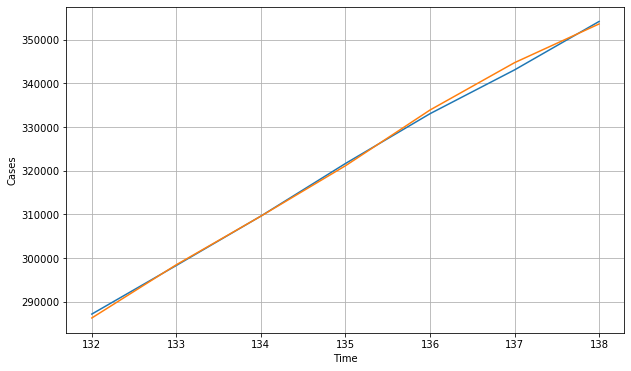

In [17]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [18]:
tf.keras.metrics.mean_absolute_percentage_error(x_valid, rnn_forecast).numpy()

0.20370512